In [51]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.datasets import load_digits
from sklearn.cluster import KMeans
from sklearn.neighbors  import LocalOutlierFactor
from sklearn.metrics import silhouette_score

Etant donnée qu'on a pas d'etiquettes, il n'est plus necessaire de diviser les données en train et test

- la plus part des algo qui se base sur des calculqs sont plus efficaces etant normalisés
- la reduction dimensionnelle consiste à reduire le nombre de dimension (le nombre de feature) de notre dataset. Le soucis est le fait que cela diminue la quantité d'information de notre dataset; du coup il ne faut pas trop reduire.

ici on va faire une reduction dimensionnelle de sorte à maintenir une variance d'au moins 95%  

(1797, 30)
(36, 1)


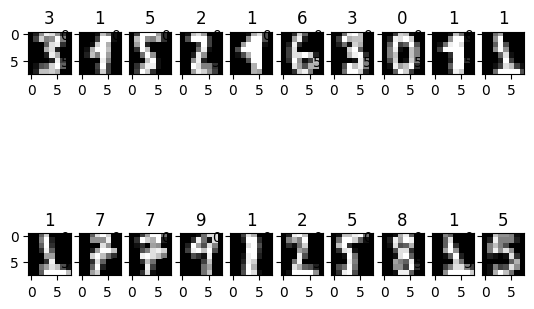

(1761, 30)


In [64]:
# jeu de données
digits = load_digits()
X = digits.data
digits_labels  = digits.target

# 1.scaling
scaler = MinMaxScaler()
X = scaler.fit_transform(X)
#2.reduction dimensionnelle
pca=PCA(n_components=0.95, random_state=42)
#print(X.shape)
X=pca.fit_transform(X)
print(X.shape)

# 3.Suppression des anomalies(des chiffres mal ecrits)"
lof= LocalOutlierFactor(n_neighbors=10)
lof.fit(X)

scores=lof.negative_outlier_factor_
# cet attribut permet de quantifier à quel point un point est une anomalie ou non
outliers= np.argwhere(scores> np.percentile(scores,98)) # mm concept que le quartile sauf que on divise pae 100...Diviser la distri bution en 100 valeur
#identification des points ayant le plus haut scores d'anomalie

print(outliers.shape)

plt.figure()
plt.gray()

for i in range(20):
  plt.subplot(2,10, i+1)
  plt.imshow(digits.images[outliers[i][0]])
  plt.title(f"{digits_labels[outliers[i][0]]}")
plt.show()

X= np.delete(X, outliers, axis=0)
digits_labels = np.delete(digits_labels, outliers, axis=0)

print(X.shape)

In [53]:
# utilisation de la methode des k moyennes
kmeans= KMeans(n_clusters=10, init="k-means++" ,random_state=42)
pred= kmeans.fit_predict(X)

#coeeficient de silhoutte: il permet de quantifier à quel point les données ont été regroupéés de manière optimal possible.
# s'il  est negatif; ça veut dire que les données so nt très mal clusteriser et que les clusters se superposent
# s'il est positif c'est qu'il n'y a rien de castastrophique au niveau des clusters. L'idéal est un coeff compris entre 0.5 et 1

coeff = silhouette_score(X, pred)
print(f"le coefficient de silhouette est de {np.round(coeff*100,decimals=1)}%")

le coefficient de silhouette est de 18.4%


Coefficient acceptable
on va chercher à l'afficher

<ipython-input-54-d8893aab2ff1>:10: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(x,y, s =100, cmap="viridis", label= i)


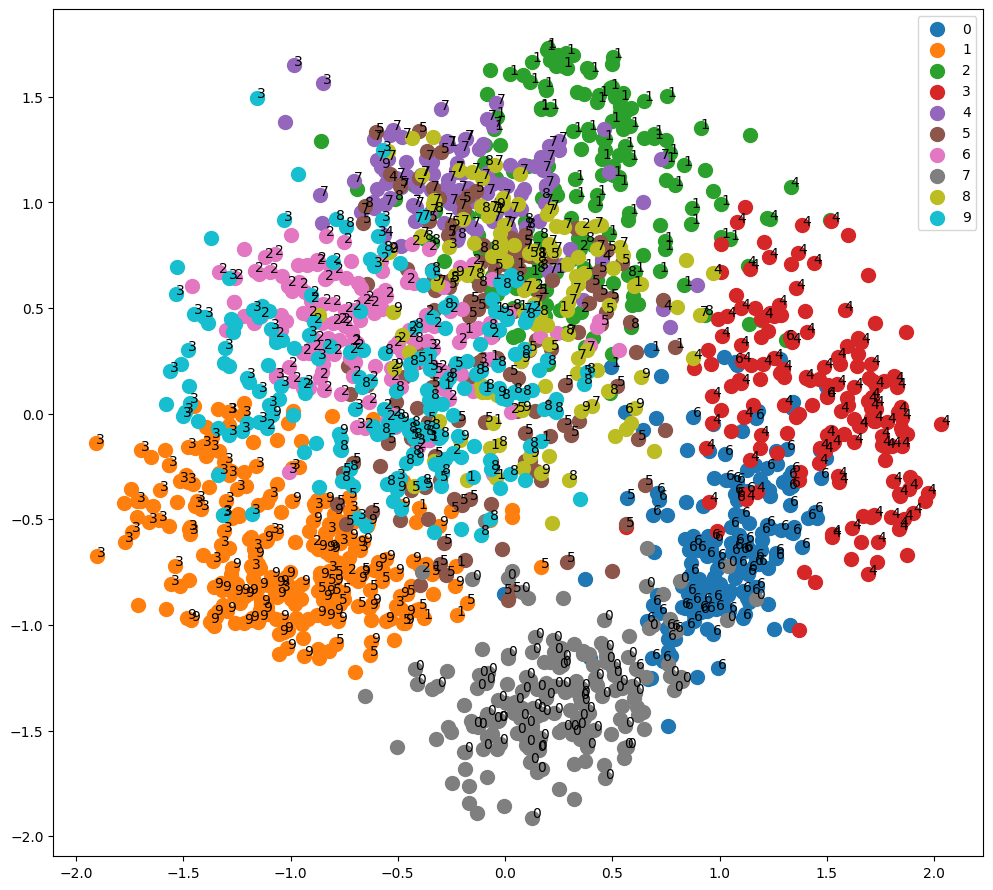

In [54]:
pca= PCA(n_components=2)
X_2D=pca.fit_transform(X)

plt.figure(figsize=(12,11))
for i in range(len(np.unique(pred))):
  pos=np.where(pred==i) #CHERCHER les indices pour LESQUELS la prediction est egale à l'iteration en cours
  x= X_2D[pos, 0].ravel()# avoir un arrayà une dim
  y= X_2D[pos, 1].ravel()

  plt.scatter(x,y, s =100, cmap="viridis", label= i)

  for j in range(0,len(x), 2):
    plt.annotate(digits_labels[pos][j], (x[j],y[j]))
plt.legend()
plt.show()

il va falloir modifier car les labels  ne correspondent pas à nos preictions

In [63]:
#analyse de l'ACP effectué

Okay, let's analyze the PCA performed in the code you provided.


**1. Data Preprocessing:**

* **Scaling:** The code uses `MinMaxScaler` to scale the data, ensuring that all features have values within a similar range (0 to 1). This is crucial for PCA, as it is sensitive to the scale of features.
* **Dimensionality Reduction with PCA:** PCA (Principal Component Analysis) is applied to reduce the number of dimensions while preserving as much variance as possible. The code aims to retain 95% of the variance, effectively reducing the number of features to a smaller set of principal components that capture the majority of the information in the dataset.


**2. Anomaly Detection and Removal:**

* **Local Outlier Factor (LOF):** LOF is used to identify and remove outliers, which are data points that are significantly different from the majority of the data. This helps improve the clustering results.
* **Outlier Removal:** Data points with the highest LOF scores (indicating potential outliers) are removed from the dataset.


**3. Clustering with K-means:**

* **K-means:** The code applies the K-means clustering algorithm to group similar data points into clusters. It uses 10 clusters, based on the dataset (digits 0-9).
* **Silhouette Score:** The Silhouette score is used to evaluate the quality of the clusters. It measures how well-separated the clusters are and how similar data points are within each cluster. A higher Silhouette score indicates better-defined clusters.


**4. Visualization in 2D:**

* **PCA for Visualization:** PCA is applied again, this time to reduce the data to 2 dimensions (principal components). This allows for easy visualization of the clustered data in a scatter plot.
* **Scatter Plot:** The scatter plot shows the data points colored according to the cluster they belong to. Annotations are added to some points to show the true labels of the digits.


**Analysis:**

* The code demonstrates a standard workflow for analyzing a dataset with unsupervised learning techniques.
* PCA is effectively used for dimensionality reduction and visualization.
* Outlier removal helps improve the quality of the clustering results.
* K-means clustering with a Silhouette score evaluation allows assessing the effectiveness of grouping the data.
* The 2D visualization of the data helps to understand how the clusters are distributed and whether they are well-separated.

**Potential Improvements:**

* Further exploration of the optimal number of clusters (using techniques like the elbow method or gap statistics) could potentially lead to better clustering results.
* More advanced visualization techniques (like t-SNE) could be used to provide a more informative representation of the data in lower dimensions.
* Exploring different clustering algorithms (like DBSCAN) might offer alternative perspectives on grouping the data.
* Performing a quantitative evaluation of the clustering performance using external metrics (if available) would provide additional insight into the effectiveness of the chosen approach.

The analysis above highlights the main steps and insights from the provided code. It focuses on the application of PCA, outlier detection, and K-means clustering for the analysis of a dataset.

SyntaxError: unterminated string literal (detected at line 3) (<ipython-input-63-f17d9ef77274>, line 3)

In [55]:
pred= np.select([pred == 0,pred == 1,pred == 2, pred == 3,pred == 4, pred == 5, pred == 6,pred == 7, pred == 8, pred == 9],
                [6,9,1,4,7,5,2,0,8,3],
                pred)


<ipython-input-57-eab9e1baa367>:10: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(x,y, s =100, cmap="viridis", label= "Group_"+str(i))


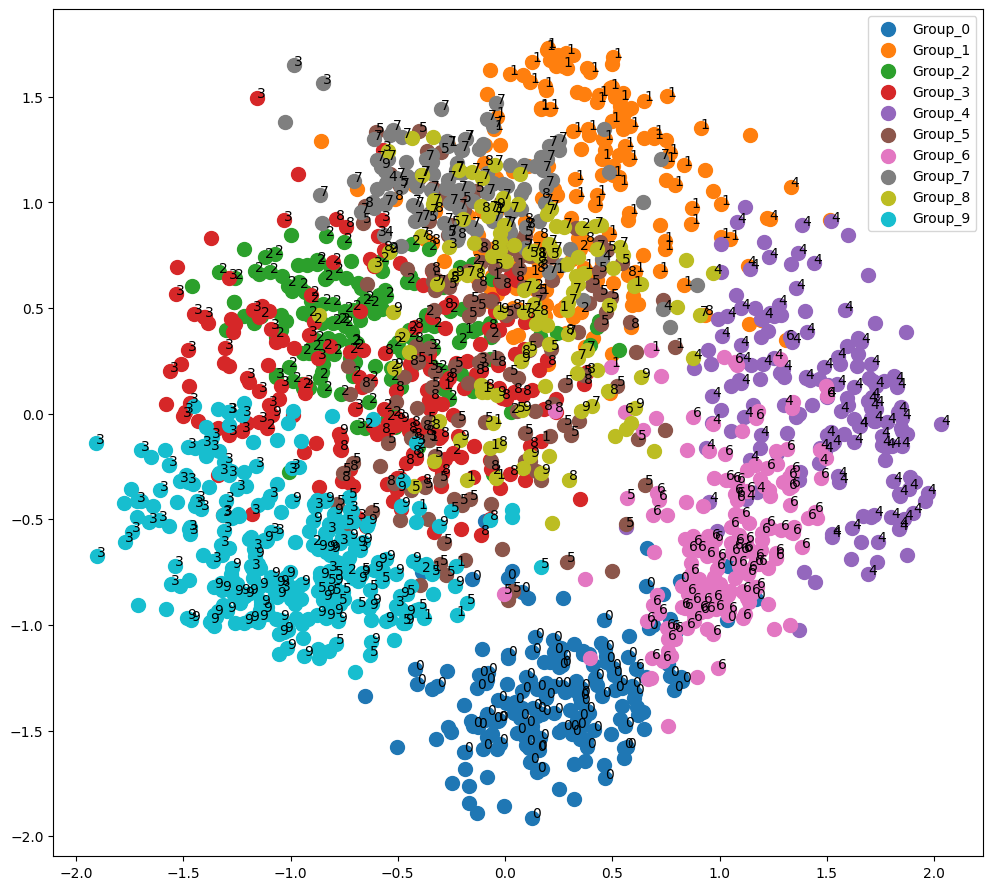

In [57]:
pca= PCA(n_components=2)
X_2D=pca.fit_transform(X)

plt.figure(figsize=(12,11))
for i in range(len(np.unique(pred))):
  pos=np.where(pred==i) #CHERCHER les indices pour LESQUELS la prediction est egale à l'iteration en cours
  x= X_2D[pos, 0].ravel()# avoir un arrayà une dim
  y= X_2D[pos, 1].ravel()

  plt.scatter(x,y, s =100, cmap="viridis", label= "Group_"+str(i))

  for j in range(0,len(x), 2):
    plt.annotate(digits_labels[pos][j], (x[j],y[j]))
plt.legend()
plt.show()

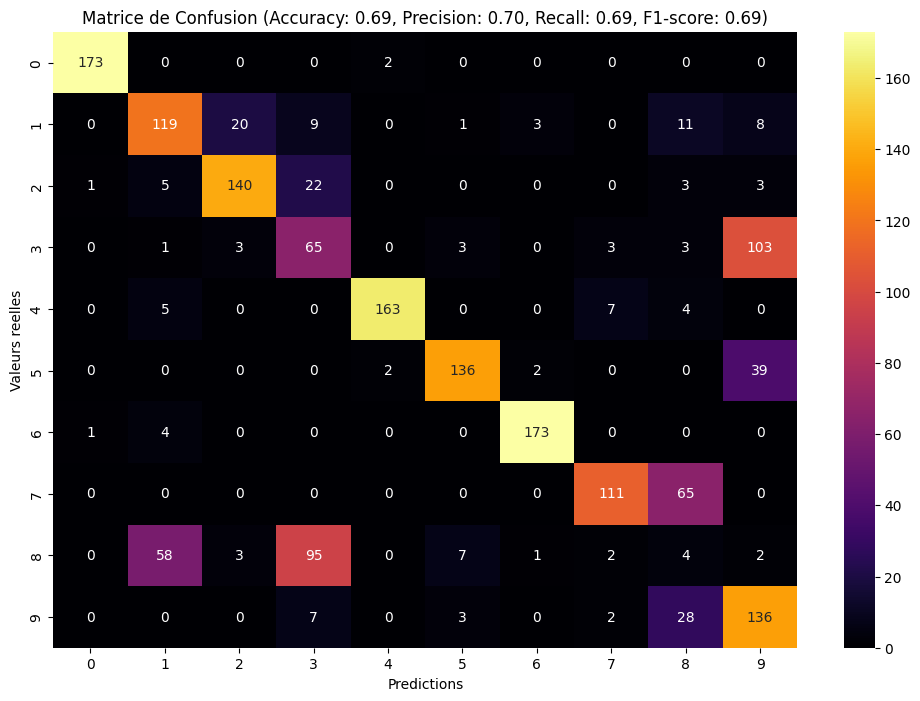

In [62]:
# Calcul de l'accuracy et d'autres indicateurs pertinents pour la heatmap
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

accuracy = accuracy_score(digits_labels, pred)
precision = precision_score(digits_labels, pred, average='weighted')
recall = recall_score(digits_labels, pred, average='weighted')
f1 = f1_score(digits_labels, pred, average='weighted')

# Affichage de la matrice de confusion avec des indicateurs supplémentaires
plt.figure(figsize=(12, 8))
sns.heatmap(conf_matrix, annot=True, cmap="inferno", fmt="d")
plt.xlabel("Predictions")
plt.ylabel("Valeurs reelles")
plt.title(f"Matrice de Confusion (Accuracy: {accuracy:.2f}, Precision: {precision:.2f}, Recall: {recall:.2f}, F1-score: {f1:.2f})")
plt.show()